# Final Project Submission

Please fill out:
* Student name: Andy Martin del Campo
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Victor
* Blog post URL:


### Project Steps I think

1. Get Data
2. Clean Data
    a. Make sure all data is the right type
    b. Make sure there are no NaN values
    c. Check for duplicates
    d. Check for outliers
    e. Normalize
3. Figure out which features are important
    a. Check for correlation
    b. RFE
4. Model

look up Crisp-DM and OSEMN

# Getting the data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


df = pd.read_csv('kc_house_data.csv')

In [2]:
#brief look at data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#get info on columns
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## First Assumptions
- It looks like the data all has the same number of entries. 

# Cleaning the Data

## Check for duplicates

In [4]:
duplicates = df[df.duplicated()]
print(len(duplicates))

0


- For the 'id' column there are several houses which have been relisted at several points. It is okay that they have the same value
- No other column could show that there are duplicates


## Changing the column type to be something that makes sense

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
#Change date from a string to a datetime
df.date = pd.to_datetime(df.date)

In [7]:
#Change sqft_basement from a string to a float
#The issue is there are a lot of ? used. First I will change these to NaN 
#values and then the data type to float
df.sqft_basement = df.sqft_basement.replace('?',np.NaN)

df.sqft_basement = df.sqft_basement.astype('float64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

## Using IterativeImputer to impute missing values


In [9]:
df_no_date = df.drop(columns = ['date'])
df_no_date.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [10]:
imp = IterativeImputer(max_iter=10, verbose=0)
imp.fit(df_no_date)
imputed_df = np.round(imp.transform(df_no_date))
imputed_df = pd.DataFrame(imputed_df, columns=df_no_date.columns)
imputed_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,221900.0,3.0,1.0,1180.0,5650.0,1.0,-0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,48.0,-122.0,1340.0,5650.0
1,6.414100e+09,538000.0,3.0,2.0,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,48.0,-122.0,1690.0,7639.0
2,5.631500e+09,180000.0,2.0,1.0,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,131.0,98028.0,48.0,-122.0,2720.0,8062.0
3,2.487201e+09,604000.0,4.0,3.0,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,48.0,-122.0,1360.0,5000.0
4,1.954401e+09,510000.0,3.0,2.0,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,48.0,-122.0,1800.0,7503.0


In [11]:
imputed_df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
imputed_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.059777,2080.321850,1.509941e+04,1.534750,0.006760,0.234153,3.409825,7.657915,1788.596842,291.725008,1970.999676,83.784600,98077.951845,47.694356,-122.000046,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.754435,918.106125,4.141264e+04,0.554376,0.081944,0.765979,0.650546,1.173200,827.759761,442.667800,29.375234,367.760789,53.513072,0.460690,0.040258,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,-0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,-274.000000,98001.000000,47.000000,-123.000000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.000000,-122.000000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,2.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,48.000000,-122.000000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,48.000000,-122.000000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,1.000000,6.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,48.000000,-121.000000,6210.000000,871200.000000


In [13]:
imputed_df.yr_renovated.value_counts()

 0.0       17018
 2014.0       73
 2013.0       31
 2003.0       31
 2007.0       30
 2000.0       29
 2005.0       29
 1990.0       22
 2004.0       22
 82.0         22
-11.0         22
-17.0         21
 2009.0       21
 42.0         20
 104.0        20
 1989.0       20
 2006.0       20
 46.0         20
 9.0          19
-8.0          19
 35.0         19
 136.0        19
 54.0         19
 16.0         19
 20.0         19
-19.0         18
 53.0         18
 8.0          18
 2002.0       17
 34.0         17
           ...  
 594.0         1
 1971.0        1
 792.0         1
-133.0         1
-233.0         1
 291.0         1
 1948.0        1
-179.0         1
 348.0         1
-184.0         1
-108.0         1
 1934.0        1
 756.0         1
 471.0         1
 646.0         1
-232.0         1
 352.0         1
-211.0         1
 259.0         1
-126.0         1
 603.0         1
-165.0         1
 337.0         1
 626.0         1
-172.0         1
 296.0         1
-156.0         1
 1976.0       

This seems to have worked well for every feature except 'yr_renovated'. Since it gives very low years and negatives because so many 0's were already in place. This column will more than likely not be relevant. I'll also drop the index column.

In [14]:
imputed_df = imputed_df.drop(columns = ['id'])

### Edit yr_renovated so that any values below 1900 are 0 and all other values are 1 for renovated

In [15]:
imputed_df.yr_renovated = imputed_df.yr_renovated.astype('int64')

In [16]:
imputed_df.loc[imputed_df.yr_renovated < 1975, 'yr_renovated'] = 0
imputed_df.loc[imputed_df.yr_renovated != 0, 'yr_renovated'] = 1

In [17]:
imputed_df.yr_renovated.describe()

count    21597.000000
mean         0.030977
std          0.173258
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: yr_renovated, dtype: float64

In [18]:
imputed_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.059777,2080.321850,1.509941e+04,1.534750,0.006760,0.234153,3.409825,7.657915,1788.596842,291.725008,1970.999676,0.030977,98077.951845,47.694356,-122.000046,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.754435,918.106125,4.141264e+04,0.554376,0.081944,0.765979,0.650546,1.173200,827.759761,442.667800,29.375234,0.173258,53.513072,0.460690,0.040258,685.230472,27274.441950
min,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,-0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.000000,-123.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.000000,-122.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,2.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,48.000000,-122.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,48.000000,-122.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,1.000000,6.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,1.000000,98199.000000,48.000000,-121.000000,6210.000000,871200.000000


In [19]:
imputed_df.yr_renovated.value_counts()

0    20928
1      669
Name: yr_renovated, dtype: int64

## Limit price to 2 Million


In [20]:
imputed_df.drop(imputed_df[imputed_df.price > 2000000].index, inplace = True)

## Look at data

In [21]:
#since no data at this point uses a decimal value I set the datatype to int
#I was getting an error from categorical variables with names like view3.0
imputed_df = imputed_df.astype('int64')

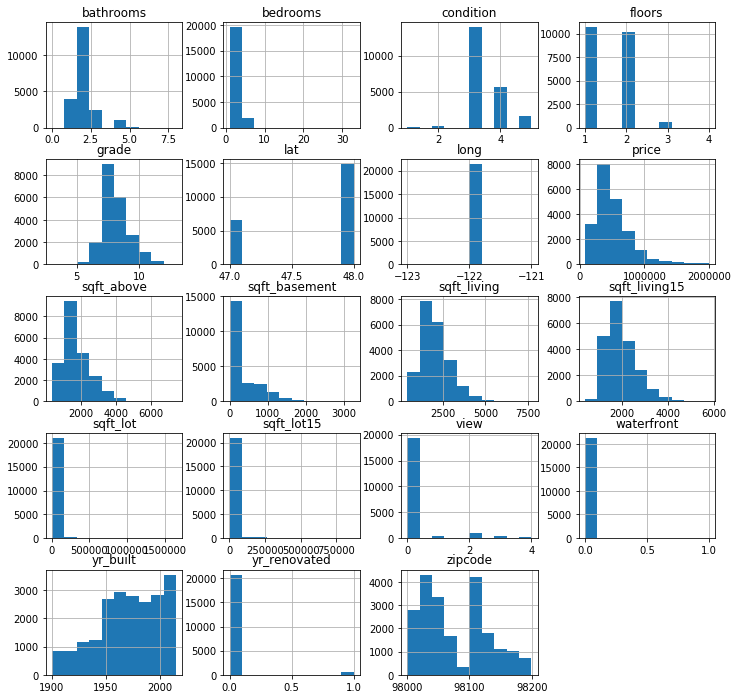

In [22]:
imputed_df.hist(figsize=(12,12));

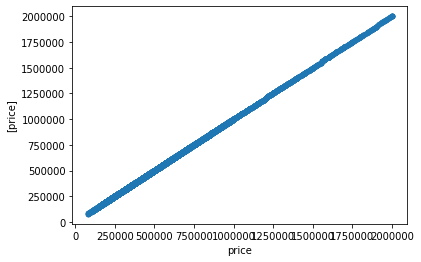

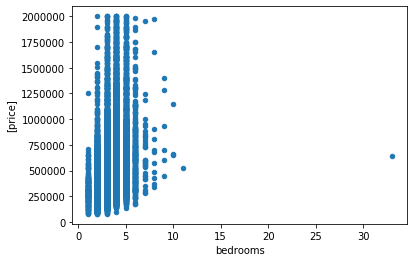

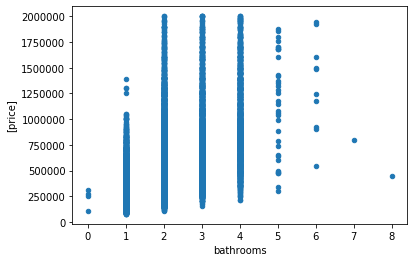

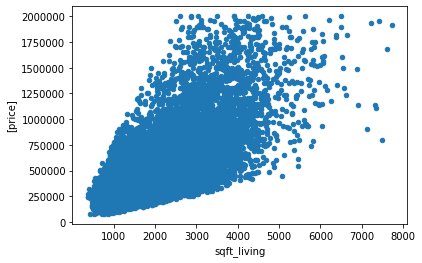

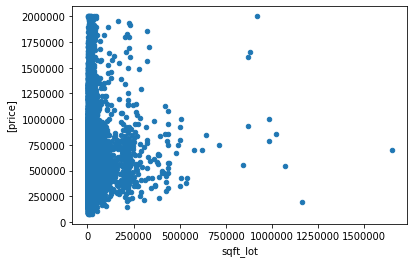

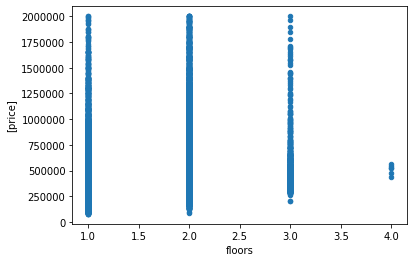

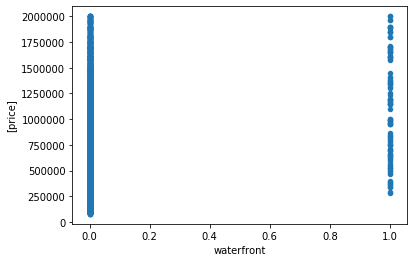

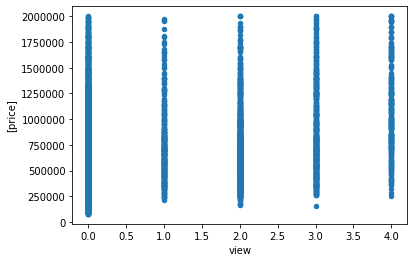

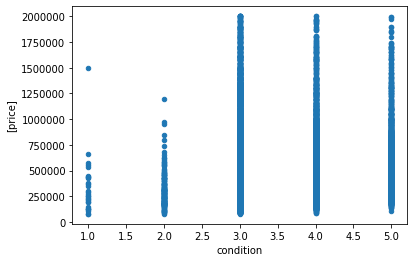

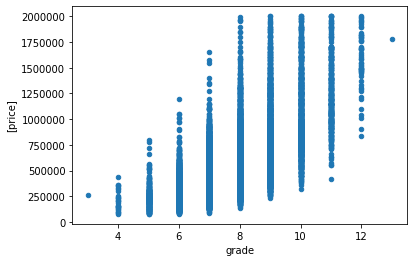

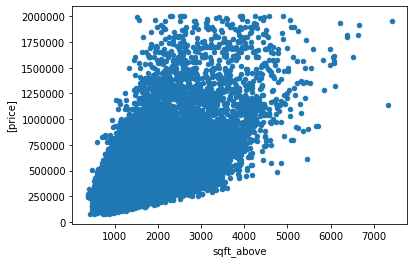

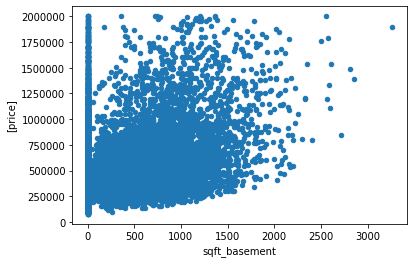

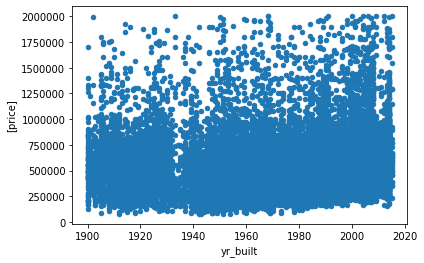

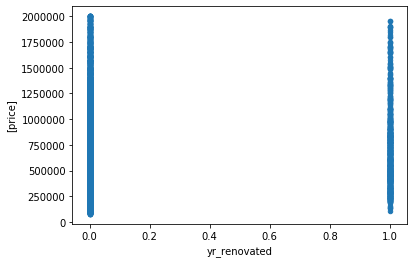

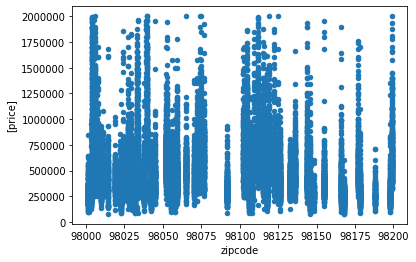

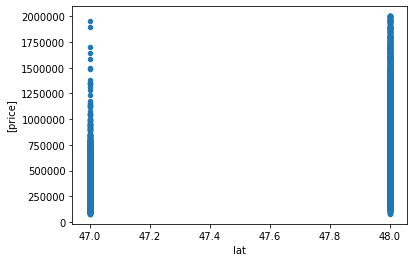

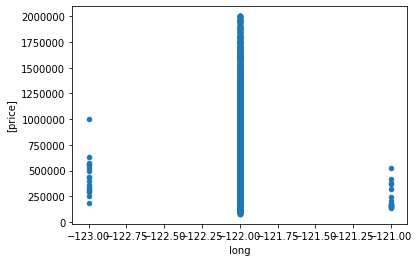

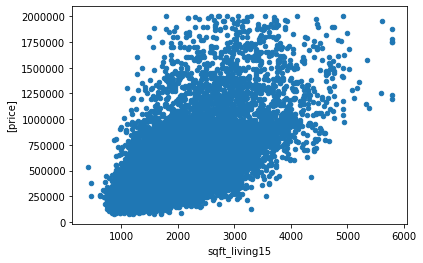

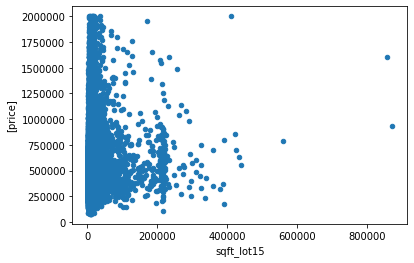

In [23]:
for col in imputed_df:
    imputed_df.plot.scatter(x=col, y=['price'])    

### Limit Sqft_Lot to and Sqft_Lot15 to 50000

In [24]:
imputed_df.drop(imputed_df[imputed_df.sqft_lot > 50000].index, inplace = True)
imputed_df.drop(imputed_df[imputed_df.sqft_lot15 > 50000].index, inplace = True)


### Observations from scatter plots
- There seem to be a few categorical variables
    -bathrooms
    -floors
    -waterfront
    -view
    -condition
    -grade
    -lat,long
    
- There is an outlier of 33 bedrooms that should probably be removed

- Zipcodes won't fit into a model unless they are binned which doesn't make sense so they can be dropped

In [25]:
print(imputed_df[imputed_df.bedrooms > 30])

        price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
15856  640000        33          2         1620      6000       1           0   

       view  condition  grade  sqft_above  sqft_basement  yr_built  \
15856     0          5      7        1040            580      1947   

       yr_renovated  zipcode  lat  long  sqft_living15  sqft_lot15  
15856             0    98103   48  -122           1330        4700  


In [26]:
imputed_df.drop(imputed_df[imputed_df.bedrooms > 20].index, inplace = True)

In [27]:
#drop zip codes
#imputed_df = imputed_df.drop(columns = ['zipcode'])

In [28]:
imputed_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,48,-122,1340,5650
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1,98125,48,-122,1690,7639
2,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,48,-122,2720,8062
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,48,-122,1360,5000
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,48,-122,1800,7503


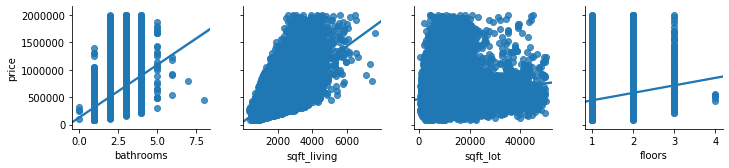

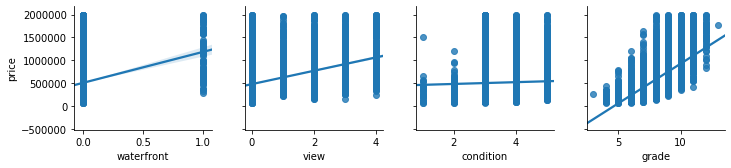

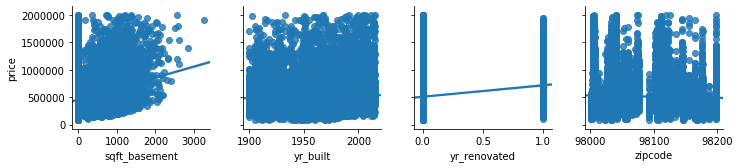

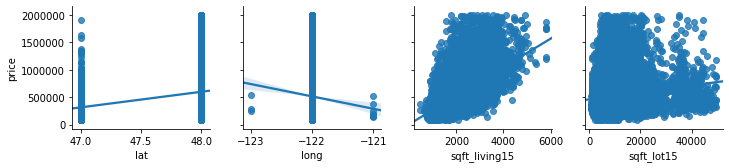

In [29]:
sns.pairplot(imputed_df, x_vars=['bathrooms', 'sqft_living', 'sqft_lot', 'floors'], y_vars='price', kind='reg');
sns.pairplot(imputed_df, x_vars=['waterfront', 'view', 'condition', 'grade'], y_vars='price', kind='reg');
sns.pairplot(imputed_df, x_vars=['sqft_basement', 'yr_built', 'yr_renovated', 'zipcode'], y_vars='price', kind='reg');
sns.pairplot(imputed_df, x_vars=['lat', 'long', 'sqft_living15', 'sqft_lot15'], y_vars='price', kind='reg');

## A Model Using Raw Features

In [30]:
from statsmodels.formula.api import ols

outcome = 'price'
predictors = []
for col in imputed_df:
    if col != 'price':
        predictors.append(col)
predictors = '+'.join(predictors)

formula = outcome + '~' + predictors
model = ols(formula=formula, data=imputed_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     3205.
Date:                Thu, 05 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:36:34   Log-Likelihood:            -2.7209e+05
No. Observations:               20409   AIC:                         5.442e+05
Df Residuals:                   20391   BIC:                         5.444e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.206e+05   4.88e+06      0.127      0.899   -8.94e+06    1.02e+07
bedrooms      -1.676e+04   1530.882    -10.951      0.000   -1.98e+04   -1.38e+04
bathrooms      2.863e+04   2133.034     13.421      0.000    2.44e+04    3.28e+04
sqft_living      72.3677      1.845     39.232      0.000      68.752      75.983
sqft_lot         -0.7618      0.302     -2.519      0.012      -1.355      -0.169
floors         1.377e+04   2506.748      5.495      0.000    8860.322    1.87e+04
waterfront     3.534e+05    1.7e+04     20.838      0.000     3.2e+05    3.87e+05
view           4.444e+04   1682.835     26.407      0.000    4.11e+04    4.77e+04
condition      3.029e+04   1796.246     16.862      0.000    2.68e+04    3.38e+04
grade           8.92e+04   1676.795     53.197      0.000    8.59e+04    9.25e+04
sqft_above       44.5753      1.825     24.422      0.000      40.998      48.153
sqft_basement    27.7924      2.063     13.474      0.000      23.750      31.835
yr_built      -2051.5229     50.622    -40.527      0.000   -2150.745   -1952.300
yr_renovated   6.284e+04   6427.016      9.777      0.000    5.02e+04    7.54e+04
zipcode        -177.3469     22.330     -7.942      0.000    -221.116    -133.578
lat            1.948e+05   2519.821     77.315      0.000     1.9e+05       2e+05
long          -8.949e+04   3.63e+04     -2.462      0.014   -1.61e+05   -1.82e+04
sqft_living15    42.3153      2.794     15.145      0.000      36.839      47.792
sqft_lot15       -0.5721      0.338     -1.692      0.091      -1.235       0.091
==============================================================================
Omnibus:                     7227.830   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47084.946
Skew:                           1.552   Prob(JB):                         0.00
Kurtosis:                       9.763   Cond. No.                     3.55e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.59e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Test for Colinearity

In [31]:
abs(imputed_df.corr())  > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


Sqft_above seems very similar to sqft_living and has a high colinearity so I will drop sqft_above

In [32]:
imputed_df = imputed_df.drop(columns = ['sqft_above'])

## Deal with Categorical Variables

In [33]:
bedroom_dummies = pd.get_dummies(imputed_df['bedrooms'], prefix='beds', 
                                   drop_first=True)
bathroom_dummies =  pd.get_dummies(imputed_df['bathrooms'], prefix='baths', 
                                   drop_first=True)
floor_dummies = pd.get_dummies(imputed_df['floors'], prefix='flr', 
                                   drop_first=True)
waterfront_dummies = pd.get_dummies(imputed_df['waterfront'], prefix='wtrft', 
                                   drop_first=True)
view_dummies = pd.get_dummies(imputed_df['view'], prefix='view', 
                                   drop_first=True)
#grade_dummies =  pd.get_dummies(imputed_df['grade'], prefix='grade', 
#                                  drop_first=True)
condition_dummies = pd.get_dummies(imputed_df['condition'], prefix='cond', 
                                   drop_first=True)
# lat_dummies =  pd.get_dummies(imputed_df['lat'], prefix='lat', 
#                                    drop_first=True)
# long_dummies =  pd.get_dummies(imputed_df['long'], prefix='long', 
#                                    drop_first=True)
#zipcode_dummies = pd.get_dummies(imputed_df['zipcode'], prefix='zp', 
#                                     drop_first=True)



df = imputed_df

In [34]:
#Remove old variables columns
df = df.drop(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
                     'condition', 'lat', 'long', 'zipcode'], axis=1)

In [35]:
#Add new dummy columns
df = pd.concat([df, bedroom_dummies, bathroom_dummies, floor_dummies, waterfront_dummies, 
               view_dummies, condition_dummies], axis=1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20409 entries, 0 to 21596
Data columns (total 39 columns):
price            20409 non-null int64
sqft_living      20409 non-null int64
sqft_lot         20409 non-null int64
grade            20409 non-null int64
sqft_basement    20409 non-null int64
yr_built         20409 non-null int64
yr_renovated     20409 non-null int64
sqft_living15    20409 non-null int64
sqft_lot15       20409 non-null int64
beds_2           20409 non-null uint8
beds_3           20409 non-null uint8
beds_4           20409 non-null uint8
beds_5           20409 non-null uint8
beds_6           20409 non-null uint8
beds_7           20409 non-null uint8
beds_8           20409 non-null uint8
beds_9           20409 non-null uint8
beds_10          20409 non-null uint8
beds_11          20409 non-null uint8
baths_1          20409 non-null uint8
baths_2          20409 non-null uint8
baths_3          20409 non-null uint8
baths_4          20409 non-null uint8
baths_5          

## Apply Log Transform to Non-Normal Features


In [37]:
non_normal = ['sqft_living', 'sqft_lot','yr_built', 'sqft_living15', 'sqft_lot15', 'grade']
df_log = pd.DataFrame([])
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log(x))
    df_log[feat] = df[feat]

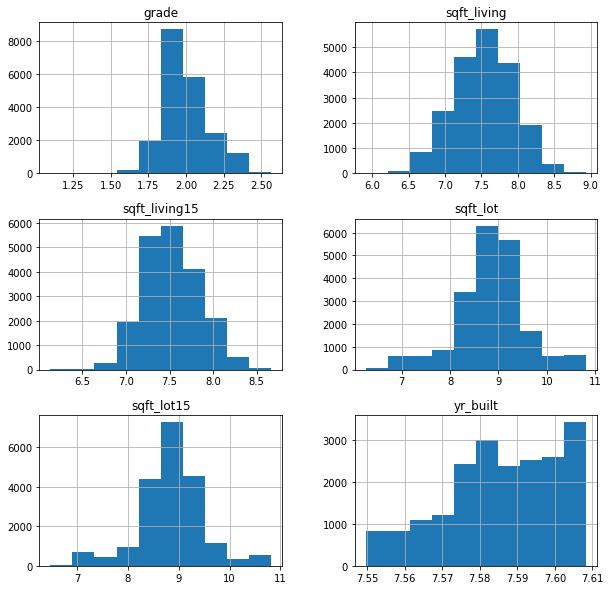

In [38]:
df_log.hist(figsize=(10,10));

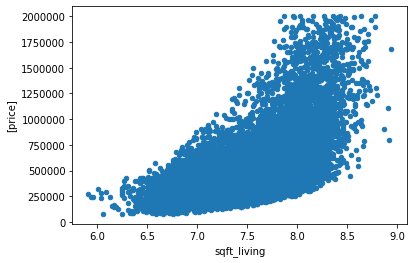

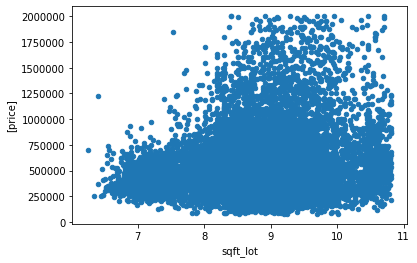

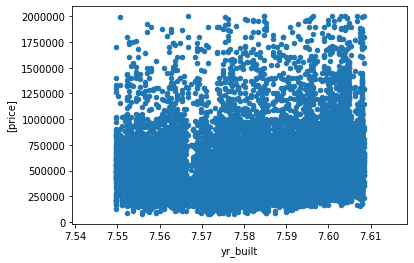

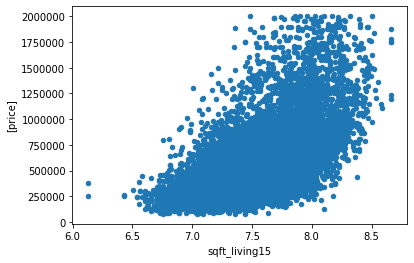

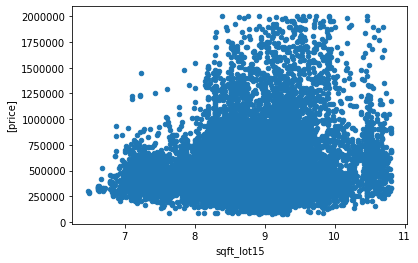

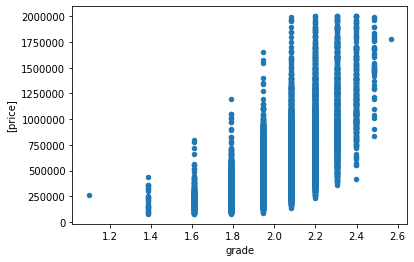

In [39]:
for col in non_normal:
    df.plot.scatter(x=col, y=['price'])    

## Apply Min-Max Scaling

In [40]:
non_normal = ['sqft_living', 'sqft_lot', 'yr_built', 'sqft_living15', 
              'sqft_lot15', 'sqft_basement', 'grade']
#set all datatypes to int first
#for feat in non_normal:
#    df[feat] = df[feat].astype('int64')
    
df_scaled = pd.DataFrame([])
for feat in non_normal:
    scaled = df[feat]
    df[feat] = (scaled-min(scaled))/(max(scaled)-min(scaled))
    df_scaled[feat] = df[feat]

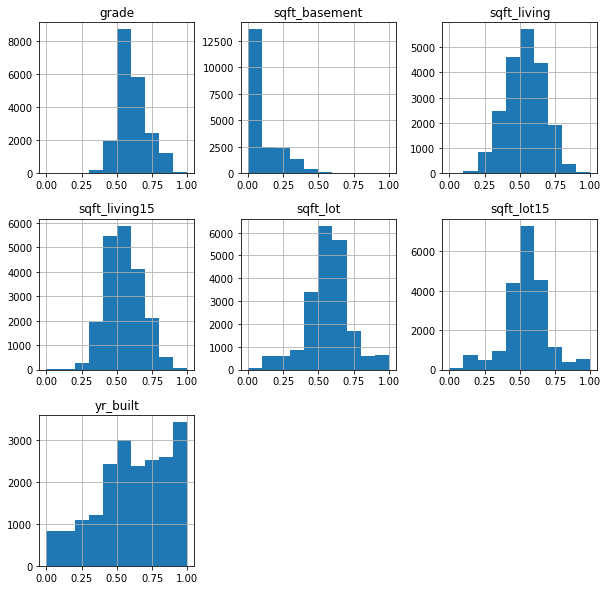

In [41]:
df_scaled.hist(figsize=(10,10));

In [42]:
df.head()

,price,sqft_living,sqft_lot,grade,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,beds_2,...,flr_4,wtrft_1,view_1,view_2,view_3,view_4,cond_2,cond_3,cond_4,cond_5
0,221900,0.383390,0.522619,0.577833,0.000000,0.485598,0,0.422164,0.498546,0,...,0,0,0,0,0,0,0,1,0,0
1,538000,0.640707,0.577002,0.577833,0.122699,0.450745,1,0.513791,0.568132,0,...,0,0,0,0,0,0,0,1,0,0
2,180000,0.242275,0.647695,0.472707,0.000000,0.293018,0,0.701697,0.580566,1,...,0,0,0,0,0,0,0,1,0,0
3,604000,0.551134,0.495844,0.577833,0.279141,0.572419,0,0.428014,0.470349,0,...,0,0,0,0,0,0,0,0,0,1
4,510000,0.500176,0.600990,0.668898,0.000000,0.761879,0,0.538689,0.563987,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
df.describe()

,price,sqft_living,sqft_lot,grade,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,beds_2,...,flr_4,wtrft_1,view_1,view_2,view_3,view_4,cond_2,cond_3,cond_4,cond_5
count,2.040900e+04,20409.000000,20409.000000,20409.000000,20409.000000,20409.000000,20409.000000,20409.000000,20409.000000,20409.000000,...,20409.000000,20409.000000,20409.000000,20409.000000,20409.000000,20409.000000,20409.000000,20409.000000,20409.000000,20409.000000
mean,5.145290e+05,0.534147,0.570809,0.627273,0.087363,0.618776,0.029987,0.549656,0.546875,0.130237,...,0.000294,0.004361,0.015728,0.042236,0.021363,0.011613,0.007203,0.650546,0.261894,0.079083
std,2.858732e+05,0.135606,0.153456,0.097781,0.130878,0.256191,0.170555,0.126507,0.147380,0.336572,...,0.017144,0.065894,0.124426,0.201133,0.144595,0.107137,0.084565,0.476809,0.439676,0.269874
min,7.800000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.180000e+05,0.442258,0.495844,0.577833,0.000000,0.450745,0.000000,0.458724,0.470349,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.450000e+05,0.537358,0.581730,0.577833,0.000000,0.650180,0.000000,0.540876,0.563094,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.295000e+05,0.630254,0.647080,0.668898,0.168712,0.847305,0.000000,0.637186,0.622047,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2.000000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
#df = df.drop(columns=['yr_built'], axis=1)

## Run Model

In [45]:
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + '~' + pred_sum

In [46]:
model = ols(formula=formula, data=df).fit()

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     935.6
Date:                Thu, 05 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:36:38   Log-Likelihood:            -2.7506e+05
No. Observations:               20409   AIC:                         5.502e+05
Df Residuals:                   20370   BIC:                         5.505e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.292e+05   9.35e+04     -5.659      0.000   -7.12e+05   -3.46e+05
sqft_living    5.499e+05    2.3e+04     23.900      0.000    5.05e+05    5.95e+05
sqft_lot      -9.051e+04   2.03e+04     -4.461      0.000    -1.3e+05   -5.07e+04
grade          1.327e+06    2.1e+04     63.159      0.000    1.29e+06    1.37e+06
sqft_basement  3.582e+04   1.35e+04      2.646      0.008    9281.712    6.24e+04
yr_built      -3.266e+05   6593.124    -49.529      0.000   -3.39e+05   -3.14e+05
yr_renovated   4.998e+04   7467.283      6.693      0.000    3.53e+04    6.46e+04
sqft_living15  3.836e+05   1.62e+04     23.690      0.000    3.52e+05    4.15e+05
sqft_lot15    -7.318e+04   2.06e+04     -3.557      0.000   -1.14e+05   -3.29e+04
beds_2        -5.278e+04   1.34e+04     -3.933      0.000   -7.91e+04   -2.65e+04
beds_3        -1.026e+05   1.35e+04     -7.624      0.000   -1.29e+05   -7.62e+04
beds_4        -1.166e+05   1.39e+04     -8.407      0.000   -1.44e+05   -8.94e+04
beds_5        -1.069e+05   1.46e+04     -7.315      0.000   -1.36e+05   -7.82e+04
beds_6        -1.457e+05   1.79e+04     -8.136      0.000   -1.81e+05   -1.11e+05
beds_7        -1.957e+05   3.41e+04     -5.735      0.000   -2.63e+05   -1.29e+05
beds_8         -5.83e+04   5.41e+04     -1.077      0.282   -1.64e+05    4.78e+04
beds_9        -8.896e+04   7.87e+04     -1.130      0.258   -2.43e+05    6.53e+04
beds_10        -8.87e+04   1.01e+05     -0.875      0.381   -2.87e+05     1.1e+05
beds_11       -3.089e+05   1.73e+05     -1.781      0.075   -6.49e+05    3.11e+04
baths_1        7.924e+04   8.65e+04      0.917      0.359   -9.02e+04    2.49e+05
baths_2        4.549e+04   8.65e+04      0.526      0.599   -1.24e+05    2.15e+05
baths_3        1.023e+05   8.66e+04      1.181      0.238   -6.75e+04    2.72e+05
baths_4        2.225e+05   8.68e+04      2.565      0.010    5.25e+04    3.93e+05
baths_5        3.219e+05   9.25e+04      3.479      0.001    1.41e+05    5.03e+05
baths_6         711.0862   1.17e+05      0.006      0.995   -2.28e+05     2.3e+05
baths_7       -2.595e+05   1.96e+05     -1.324      0.185   -6.44e+05    1.25e+05
baths_8        3.405e+04   2.08e+05      0.164      0.870   -3.74e+05    4.42e+05
flr_2          1.436e+04   3574.423      4.018      0.000    7357.462    2.14e+04
flr_3          9.453e+04   8642.253     10.938      0.000    7.76e+04    1.11e+05
flr_4          5.691e+04   7.08e+04      0.804      0.421   -8.18e+04    1.96e+05
wtrft_1        2.699e+05   2.17e+04     12.419      0.000    2.27e+05    3.12e+05
view_1         8.805e+04   9859.148      8.931      0.000    6.87e+04    1.07e+05
view_2         5.508e+04   6213.365      8.865      0.000    4.29e+04    6.73e+04
view_3         1.215e+05   8691.710     13.984      0.000    1.05e+05    1.39e+05
view_4         2.278e+05   1.36e+04     16.786   

### Observations
1. Adding zipcodes as categorical variable really increases the adj. R-squared.
2. 

## Feature Scaling

### Stepwise Selection

In [48]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [49]:
result = stepwise_selection(predictors, df["price"], verbose = True)
print('resulting features:')
print(result)

C:\Users\Andy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  sqft_living                    with p-value 0.0
Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  baths_4                        with p-value 2.66791e-171
Add  view_4                         with p-value 1.40175e-164
Add  sqft_living15                  with p-value 6.33979e-81
Add  sqft_lot                       with p-value 1.54098e-112
Add  baths_2                        with p-value 1.37818e-69
Add  view_3                         with p-value 2.83241e-51
Add  wtrft_1                        with p-value 6.00015e-40
Add  cond_5                         with p-value 2.61704e-28
Add  flr_3                          with p-value 5.1339e-27
Add  beds_2                         with p-value 9.00524e-28
Add  view_2                         with p-value 3.95308e-19
Add  view_1                         with p-value 1.66677e-20
Add  baths_5                        with p-value 1.13271e-11
Add  yr_renovated                   with p-val

In [50]:
outcome = 'price'
predictors = result
pred_sum = "+".join(predictors)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     1416.
Date:                Thu, 05 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:36:50   Log-Likelihood:            -2.7509e+05
No. Observations:               20409   AIC:                         5.502e+05
Df Residuals:                   20383   BIC:                         5.504e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -5.39e+05   1.02e+04    -52.831      0.000   -5.59e+05   -5.19e+05
sqft_living    5.164e+05   2.21e+04     23.326      0.000    4.73e+05     5.6e+05
grade          1.325e+06   2.09e+04     63.493      0.000    1.28e+06    1.37e+06
yr_built      -3.276e+05   6571.459    -49.858      0.000   -3.41e+05   -3.15e+05
baths_4        1.443e+05   8083.977     17.851      0.000    1.28e+05     1.6e+05
view_4         2.298e+05   1.36e+04     16.928      0.000    2.03e+05    2.56e+05
sqft_living15  3.961e+05   1.61e+04     24.582      0.000    3.64e+05    4.28e+05
sqft_lot      -9.129e+04   2.03e+04     -4.497      0.000   -1.31e+05   -5.15e+04
baths_2       -3.528e+04   4224.268     -8.353      0.000   -4.36e+04    -2.7e+04
view_3         1.227e+05   8693.706     14.109      0.000    1.06e+05     1.4e+05
wtrft_1        2.724e+05   2.18e+04     12.520      0.000     2.3e+05    3.15e+05
cond_5          6.39e+04   4903.132     13.032      0.000    5.43e+04    7.35e+04
flr_3          9.504e+04   8641.012     10.999      0.000    7.81e+04    1.12e+05
beds_2         4.449e+04   4192.151     10.613      0.000    3.63e+04    5.27e+04
view_2         5.517e+04   6214.124      8.878      0.000     4.3e+04    6.73e+04
view_1         8.845e+04   9866.853      8.964      0.000    6.91e+04    1.08e+05
baths_5        2.482e+05   3.29e+04      7.535      0.000    1.84e+05    3.13e+05
yr_renovated   5.053e+04   7463.045      6.770      0.000    3.59e+04    6.52e+04
cond_4          2.19e+04   3062.869      7.150      0.000    1.59e+04    2.79e+04
baths_3        2.245e+04   6142.140      3.655      0.000    1.04e+04    3.45e+04
sqft_lot15     -7.37e+04   2.06e+04     -3.581      0.000   -1.14e+05   -3.34e+04
beds_4        -1.289e+04   2927.621     -4.402      0.000   -1.86e+04   -7148.589
beds_6        -4.123e+04   1.15e+04     -3.590      0.000   -6.37e+04   -1.87e+04
beds_7        -1.051e+05   3.04e+04     -3.462      0.001   -1.65e+05   -4.56e+04
flr_2          1.524e+04   3567.494      4.271      0.000    8243.408    2.22e+04
sqft_basement  4.023e+04   1.35e+04      2.985      0.003    1.38e+04    6.67e+04
==============================================================================
Omnibus:                     5222.109   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23441.580
Skew:                           1.185   Prob(JB):                         0.00
Kurtosis:                       7.685   Cond. No.                         54.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Validation


In [51]:
y = df[['price']]
X = df.drop(['price'], axis = 1)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [53]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16327 4082 16327 4082


In [54]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [55]:
train_residuals = y_hat_train - y_train
print(train_residuals)
test_residuals = y_hat_test - y_test
print(test_residuals)

               price
3853     1048.622153
19233  127816.283421
15714 -219878.609425
5840  -217241.889883
12302  175093.774454
7971    55025.018277
18087 -529816.398620
2638  -145600.819937
12158   73522.186500
11155  403224.305132
14104  123348.302939
2948   127681.588515
1785  -141018.706096
1376  -215612.611340
8193   233323.713509
8506   118404.648798
9652   246214.467132
7008   -79373.147832
21272  -59546.471410
15936   60375.970120
6306  -105462.356907
16889  -74756.190558
21396   30617.108189
15888   53086.625300
21531  116957.922835
13763   97224.557271
13917   70291.168527
6163   104575.908584
14013  123931.079067
20172  -76955.050996
...              ...
9355     1596.742301
17869  -21682.914146
5053    78223.268323
2736    44329.856354
18865    -872.392562
13971 -788318.155295
5449  -318784.063367
19313 -331989.633659
9025    54727.018289
15522  -49321.750555
1746    40654.321871
5866    29463.068657
1150  -720873.589501
19845  138700.620168
20899   39067.892676
15605   17058

In [56]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 29584006400.669304
Test Mean Squarred Error: 30629485079.17314
